In [ ]:
author: Yuzhe Cheung

在95%的置信水平下，次品率的置信区间为: 0.0563 - 0.1837
在90%的置信水平下，次品率的置信区间为: 0.0665 - 0.1735
在95%的置信水平下，拒绝这批零配件。
在90%的置信水平下，拒绝这批零配件。


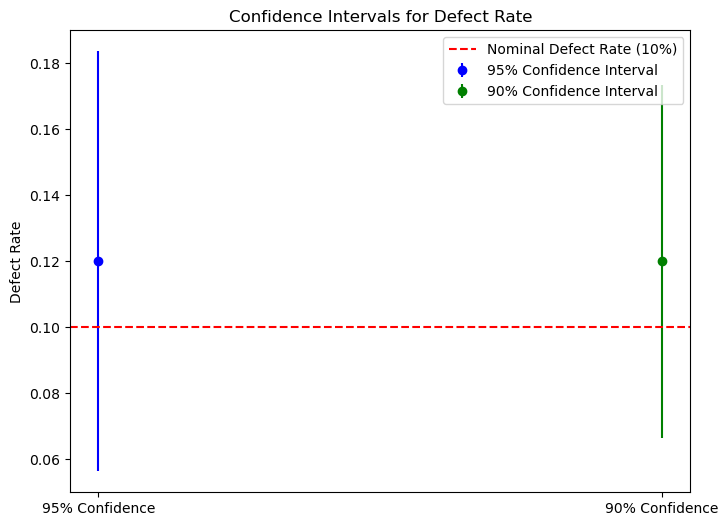

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def calculate_confidence_interval(p_hat, n, confidence_level):
    """
    计算次品率的置信区间
    p_hat: 样本次品率
    n: 样本量
    confidence_level: 置信水平（例如 0.95 或 0.90）
    """
    z = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # 计算 z 值
    margin_of_error = z * np.sqrt((p_hat * (1 - p_hat)) / n)  # 计算误差范围
    return p_hat - margin_of_error, p_hat + margin_of_error  # 返回置信区间

# 参数设置
p_nominal = 0.10  # 标称次品率
n = 100  # 样本大小，可以根据具体需求调整
confidence_95 = 0.95  # 95% 置信水平
confidence_90 = 0.90  # 90% 置信水平

# 假设抽样发现的次品率
p_hat = 0.12  # 样本次品率，假设为12%

# 计算95%置信区间
lower_95, upper_95 = calculate_confidence_interval(p_hat, n, confidence_95)
print(f"在95%的置信水平下，次品率的置信区间为: {lower_95:.4f} - {upper_95:.4f}")

# 计算90%置信区间
lower_90, upper_90 = calculate_confidence_interval(p_hat, n, confidence_90)
print(f"在90%的置信水平下，次品率的置信区间为: {lower_90:.4f} - {upper_90:.4f}")

# 判断是否可以接受这批零配件
if upper_95 <= p_nominal:
    print("在95%的置信水平下，接受这批零配件。")
else:
    print("在95%的置信水平下，拒绝这批零配件。")

if upper_90 <= p_nominal:
    print("在90%的置信水平下，接受这批零配件。")
else:
    print("在90%的置信水平下，拒绝这批零配件。")

# 可视化置信区间
plt.figure(figsize=(8, 6))
plt.errorbar(1, p_hat, yerr=[[p_hat - lower_95], [upper_95 - p_hat]], fmt='o', label='95% Confidence Interval', color='blue')
plt.errorbar(2, p_hat, yerr=[[p_hat - lower_90], [upper_90 - p_hat]], fmt='o', label='90% Confidence Interval', color='green')
plt.axhline(y=p_nominal, color='red', linestyle='--', label='Nominal Defect Rate (10%)')
plt.xticks([1, 2], ['95% Confidence', '90% Confidence'])
plt.ylabel('Defect Rate')
plt.title('Confidence Intervals for Defect Rate')
plt.legend()
plt.show()


在95%的置信水平下，最大次品数为: 9


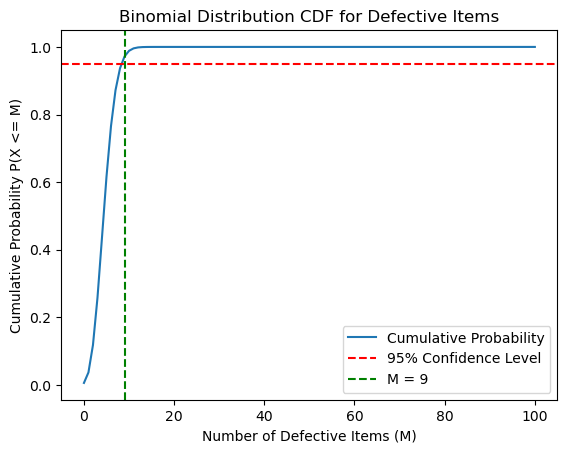

In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
n = 100  # 样本大小
p = 0.05  # 标称次品率
alpha = 0.05  # 显著性水平，对应95%置信区间

# 计算累积概率P(X <= M)
M_values = np.arange(0, n+1)
cumulative_probs = stats.binom.cdf(M_values, n, p)

# 找到满足条件的M值
M = np.argmax(cumulative_probs >= 1 - alpha)

print(f"在95%的置信水平下，最大次品数为: {M}")

# 可视化
plt.plot(M_values, cumulative_probs, label="Cumulative Probability")
plt.axhline(1 - alpha, color='red', linestyle='--', label='95% Confidence Level')
plt.axvline(M, color='green', linestyle='--', label=f'M = {M}')
plt.xlabel('Number of Defective Items (M)')
plt.ylabel('Cumulative Probability P(X <= M)')
plt.title('Binomial Distribution CDF for Defective Items')
plt.legend()
plt.show()


In [4]:
# Now let's plot the cumulative probabilities and highlight the index for M

# Recalculate cumulative probabilities for Poisson distribution
M_values = np.arange(0, 15, 1)
cumulative_probs = np.cumsum(stats.poisson.pmf(M_values, lambda_val))

# Set the confidence level (e.g., 95%)
alpha = 0.05
confidence_level = 1 - alpha

# Find the M value where cumulative probability is just greater than or equal to the confidence level
M_index = np.where(cumulative_probs >= confidence_level)[0][0]  # First index where cumulative probability exceeds 95%
M = M_values[M_index]

# Plot cumulative probabilities
plt.figure(figsize=(8, 6))
plt.plot(M_values, cumulative_probs, label="Cumulative Probability", marker='o', color='blue')

# Plot horizontal line for the confidence level
plt.axhline(confidence_level, color='red', linestyle='--', label='95% Confidence Level')

# Plot vertical line for the M value
plt.axvline(M, color='green', linestyle='--', label=f'M = {M}')

# Add labels and title
plt.title('Cumulative Probability of Poisson Distribution with $\lambda=5$', fontsize=14)
plt.xlabel('Number of Defective Products (x)', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
plt.legend()

# Show the plot
plt.show()

<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
/var/folders/8x/yz6jcll96_n6ht9zz7njjrwm0000gn/T/ipykernel_74389/2750928019.py:26: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Cumulative Probability of Poisson Distribution with $\lambda=5$', fontsize=14)
/var/folders/8x/yz6jcll96_n6ht9zz7njjrwm0000gn/T/ipykernel_74389/2750928019.py:26: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Cumulative Probability of Poisson Distribution with $\lambda=5$', fontsize=14)


NameError: name 'lambda_val' is not defined

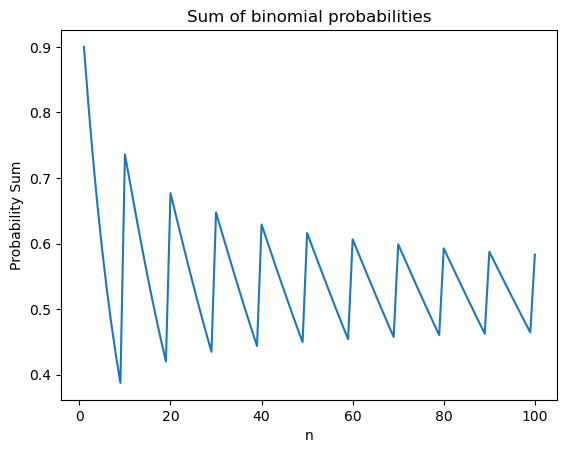

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# 参数设置
p = 0.1
n_max = 100
x_axis = np.arange(1, n_max + 1)
y = np.zeros(n_max)

# 计算 y 值
for n in range(1, n_max + 1):
    temp = 0
    for x in range(0, n // 10 + 1):
        temp += binom.pmf(x, n, p)  # 计算二项分布概率质量函数 (PMF)
    y[n - 1] = temp  # 注意数组索引从0开始

# 绘制结果
plt.figure()
plt.plot(x_axis, y)
plt.xlabel('n')
plt.ylabel('Probability Sum')
plt.title('Sum of binomial probabilities')
plt.show()


In [6]:

scenarios = [
    {"零配件1_次品率": 0.10, "零配件1_购买单价": 4, "零配件1_检测成本": 2,
     "零配件2_次品率": 0.10, "零配件2_购买单价": 18, "零配件2_检测成本": 3,
     "成品_次品率": 0.10, "装配成本": 6, "成品_检测成本": 3, "市场售价": 56,
     "调换损失": 6, "拆解费用": 5},

    {"零配件1_次品率": 0.20, "零配件1_购买单价": 4, "零配件1_检测成本": 2,
     "零配件2_次品率": 0.20, "零配件2_购买单价": 18, "零配件2_检测成本": 3,
     "成品_次品率": 0.20, "装配成本": 6, "成品_检测成本": 3, "市场售价": 56,
     "调换损失": 6, "拆解费用": 5},

    {"零配件1_次品率": 0.10, "零配件1_购买单价": 4, "零配件1_检测成本": 2,
     "零配件2_次品率": 0.10, "零配件2_购买单价": 18, "零配件2_检测成本": 3,
     "成品_次品率": 0.10, "装配成本": 6, "成品_检测成本": 3, "市场售价": 56,
     "调换损失": 30, "拆解费用": 5},

    {"零配件1_次品率": 0.20, "零配件1_购买单价": 4, "零配件1_检测成本": 2,
     "零配件2_次品率": 0.20, "零配件2_购买单价": 18, "零配件2_检测成本": 3,
     "成品_次品率": 0.20, "装配成本": 6, "成品_检测成本": 2, "市场售价": 56,
     "调换损失": 30, "拆解费用": 5},

    {"零配件1_次品率": 0.10, "零配件1_购买单价": 4, "零配件1_检测成本": 2,
     "零配件2_次品率": 0.10, "零配件2_购买单价": 18, "零配件2_检测成本": 3,
     "成品_次品率": 0.10, "装配成本": 6, "成品_检测成本": 2, "市场售价": 56,
     "调换损失": 10, "拆解费用": 5},

    {"零配件1_次品率": 0.05, "零配件1_购买单价": 4, "零配件1_检测成本": 2,
     "零配件2_次品率": 0.05, "零配件2_购买单价": 18, "零配件2_检测成本": 3,
     "成品_次品率": 0.05, "装配成本": 6, "成品_检测成本": 3, "市场售价": 56,
     "调换损失": 10, "拆解费用": 40},
]

# 计算每个情境的总成本
def calculate_cost(scenario, 检测零配件1=True, 检测零配件2=True, 检测成品=True): 
    if 检测零配件1:
        零配件1_不合格品处理 = scenario["零配件1_次品率"] * scenario["零配件1_检测成本"]
    else:
        零配件1_不合格品处理 = scenario["零配件1_次品率"] * scenario["装配成本"] 
    if 检测零配件2:
        零配件2_不合格品处理 = scenario["零配件2_次品率"] * scenario["零配件2_检测成本"]
    else:
        零配件2_不合格品处理 = scenario["零配件2_次品率"] * scenario["装配成本"] 
    if 检测成品:
        成品_不合格品处理 = scenario["成品_次品率"] * scenario["成品_检测成本"]
    else:
        成品_不合格品处理 = scenario["成品_次品率"] * scenario["市场售价"]  
    调换成本 = scenario["调换损失"] * scenario["成品_次品率"]
    拆解成本 = scenario["拆解费用"] * scenario["成品_次品率"]
     
    总成本 = 零配件1_不合格品处理 + 零配件2_不合格品处理 + 成品_不合格品处理 + min(调换成本, 拆解成本)
    return 总成本 
# 执行计算
for idx, scenario in enumerate(scenarios):
    cost = calculate_cost(scenario, 检测零配件1=True, 检测零配件2=True, 检测成品=True)
    print(f"情境 {idx + 1} 的总成本: {cost:.2f}")


情境 1 的总成本: 1.30
情境 2 的总成本: 2.60
情境 3 的总成本: 1.30
情境 4 的总成本: 2.40
情境 5 的总成本: 1.20
情境 6 的总成本: 0.90


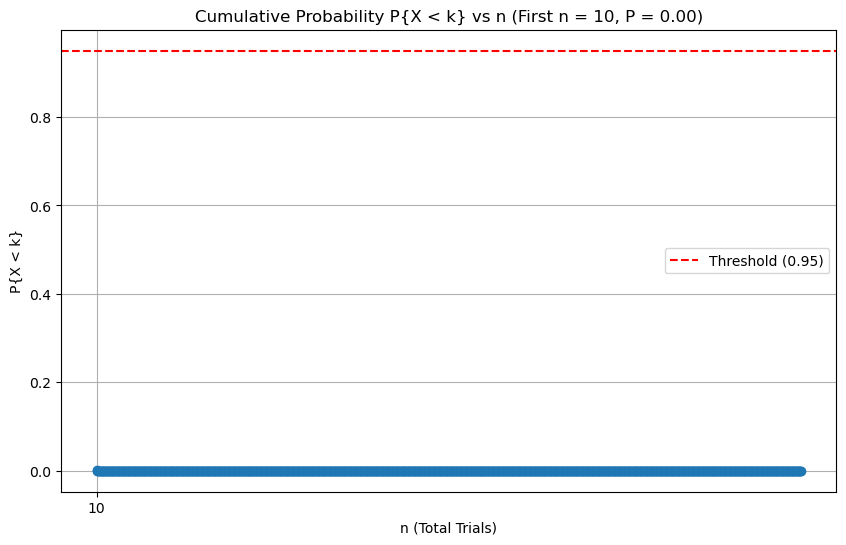

In [7]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import binom  

# Parameters  
p = 0.5  # Probability of success  
threshold = 0.95  # Probability threshold  
n_start = 10  # Start with n=10  
n_end = 1000  # Set an upper bound for n to avoid infinite loop  

# Precompute n values
n_values = np.arange(n_start, n_end + 1)  # Create an array of n values  
k_values = n_values // 10  # Calculate k for each n  

# Calculate cumulative probabilities for each n
probabilities = binom.cdf(k_values - 1, n_values, p)

# Find the first n where the probability exceeds the threshold
exceed_idx = np.argmax(probabilities >= threshold)
n_exceed = n_values[exceed_idx]  # n value where threshold is exceeded
prob_exceed = probabilities[exceed_idx]

# Plotting  
plt.figure(figsize=(10, 6))  
plt.plot(n_values, probabilities, marker='o')  
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold (0.95)')  
plt.title(f'Cumulative Probability P{{X < k}} vs n (First n = {n_exceed}, P = {prob_exceed:.2f})')  
plt.xlabel('n (Total Trials)')  
plt.ylabel('P{X < k}')  
plt.xticks(np.arange(n_start, n_exceed + 1, step=20))  # Adjust x-ticks for clarity
plt.grid()  
plt.legend()  
plt.show()  


In [ ]:
from scipy.stats import binom

def find_min_n(p, threshold=0.95):
    n = 10  # Start from n = 10
    while True:
        # 使用动态的 k 值，使得 k 相对于 n 增长更合理
        k = int(n * p)  # k 选择为 n 的 p 百分比，取整数
        # 计算 P{X < k}
        prob = binom.cdf(k - 1, n, p)
        if prob >= threshold:
            return n
        n += 1  # Increment n

# Example usage
p = 0.1
min_n = find_min_n(p)
print(f"The minimum n such that P{{X < k}} >= 0.95 is: {min_n}")


In [ ]:
from scipy.stats import binom, poisson
 
n_large = 1000   # 大样本 n
p_small = 0.01   # 小概率 p
lambda_val = n_large * p_small  # 对应的 λ 值

# 定义 x 轴取值范围
x = np.arange(0, 20)

# 计算二项分布和泊松分布的概率质量函数
binom_probs = binom.pmf(x, n_large, p_small)
poisson_probs = poisson.pmf(x, lambda_val)
plt.figure(figsize=(10, 6))

# 绘制二项分布的概率质量函数
plt.subplot(1, 2, 1)
plt.bar(x, binom_probs, color='blue', alpha=0.6, label='Binomial Distribution', width=0.8)
plt.title(f'Binomial Distribution\n$n={n_large}, p={p_small}$')
plt.xlabel('k')
plt.ylabel('Probability')
plt.legend()

# 绘制泊松分布的概率质量函数
plt.subplot(1, 2, 2)
plt.bar(x, poisson_probs, color='red', alpha=0.6, label='Poisson Distribution', width=0.8)
plt.title(f'Poisson Distribution\n$λ={lambda_val}$')
plt.xlabel('k')
plt.ylabel('Probability')
plt.legend()

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import itertools
from sympy import symbols, Piecewise

# 定义符号变量 n0
n0 = symbols('n0')

# 定义参数
b1, b2, t1, t2, t3, s0, d0, l0, p1, p2, p3, c0 = 4, 18, 2, 3, 3, 56, 40, 10, 0.05, 0.05, 0.05, 6

# 初始化数据存储列表
data = []

# 所有可能的α组合
alpha_combinations = list(itertools.product([0, 1], repeat=4))

# 计算每种组合的 benefit
for alpha in alpha_combinations:
    alpha1, alpha2, alpha3, alpha4 = alpha
    n1, n2 = n0, n0  # n1 = n2 = n0

    # 计算 n3 和 n4
    n3 = Piecewise((n0, (1-alpha1)*(1-alpha2)), (alpha1*0.9*n0, alpha1), (alpha2*0.9*n0, alpha2), (0.9*n0, True))
    n4 = p3 * n3

    # 计算 z
    z = b1*n1 + b2*n2 + alpha1*t1*n1 + alpha2*t2*n2 + c0*n3 + alpha3*t3*n3 + alpha4*d0*n4 - alpha3*l0*n4

    # 计算 benefit
    benefit = s0*n3 - z

    # 简化并存储结果
    benefit_expr = str(benefit.simplify())
    data.append((alpha, benefit_expr))

# 创建DataFrame
df = pd.DataFrame(data, columns=['Alpha Combination', 'Benefit Expression'])

# 将DataFrame写入Excel文件
excel_filename = 'benefit_results.xlsx'
df.to_excel(excel_filename, index=False)

print(f"Results have been saved to {excel_filename}")

Results have been saved to benefit_results.xlsx


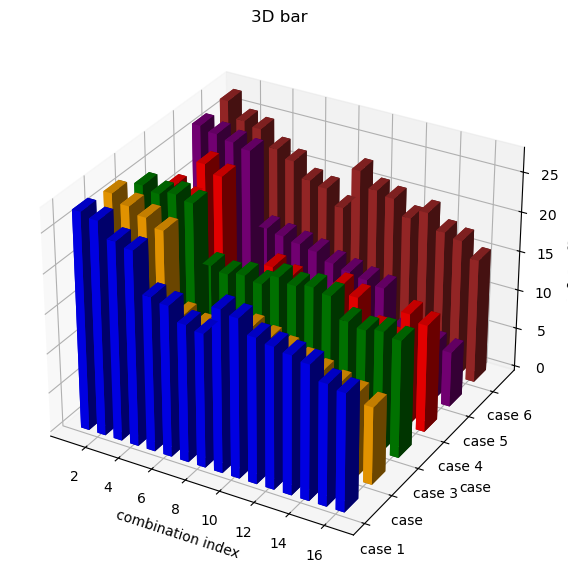

In [8]:
# 使用用户提供的表格数据绘制3D柱状图
# 更新数据和颜色标签，确保正确使用数据
z_data = np.array([
    [27.4, 26.9, 25.0, 24.5, 19.46, 19.01, 17.3, 16.85, 20.46, 20.01, 18.3, 17.85, 17.46, 17.01, 15.3, 14.85],  # 情况1
    [26.8, 25.8, 25.0, 24.0, 14.04, 13.24, 12.6, 11.8, 15.04, 14.24, 13.6, 12.8, 12.04, 11.24, 10.6, 9.8],      # 情况2
    [25.0, 24.5, 25.0, 24.5, 17.3, 16.85, 17.3, 16.85, 18.3, 17.85, 18.3, 17.85, 15.3, 14.85, 15.3, 14.85],    # 情况3
    [22.0, 21.0, 26.0, 25.0, 12.2, 11.4, 15.4, 14.6, 12.2, 11.4, 15.4, 14.6, 11.2, 10.4, 14.4, 13.6],          # 情况4
    [27.0, 26.5, 26.0, 25.5, 16.2, 15.8, 15.4, 15.0, 14.1, 13.65, 13.2, 12.75, 8.2, 7.8, 7.4, 7.0],            # 情况5
    [27.5, 25.5, 25.0, 23.0, 22.025, 20.125, 19.65, 17.75, 23.025, 21.125, 20.65, 18.75, 20.025, 18.125, 17.65, 15.75] # 情况6
])

# 重新定义 x, y 网格
x_vals = np.arange(1, 17)  # Index for combinations (1 to 16)
y_vals = np.arange(1, 7)   # Situations (1 to 6)

# Prepare grid for x, y
x_grid_new, y_grid_new = np.meshgrid(x_vals, y_vals)

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Colors for each situation
color_map = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Plot bars, same color for each situation (row)
for i in range(z_data.shape[0]):
    ax.bar3d(x_grid_new[i, :], y_grid_new[i, :], np.zeros_like(z_data[i, :]), 0.5, 0.5, z_data[i, :], color=color_map[i], shade=True)

# Set axis labels
ax.set_xlabel(' combination index')
ax.set_ylabel('case')
ax.set_zlabel('n_0 coefficient')
ax.set_title('3D bar')

# Set y-ticks for situations
ax.set_yticks(np.arange(1, 7))
ax.set_yticklabels(['case 1', 'case ', 'case 3', 'case 4', 'case 5', 'case 6'])

plt.show()


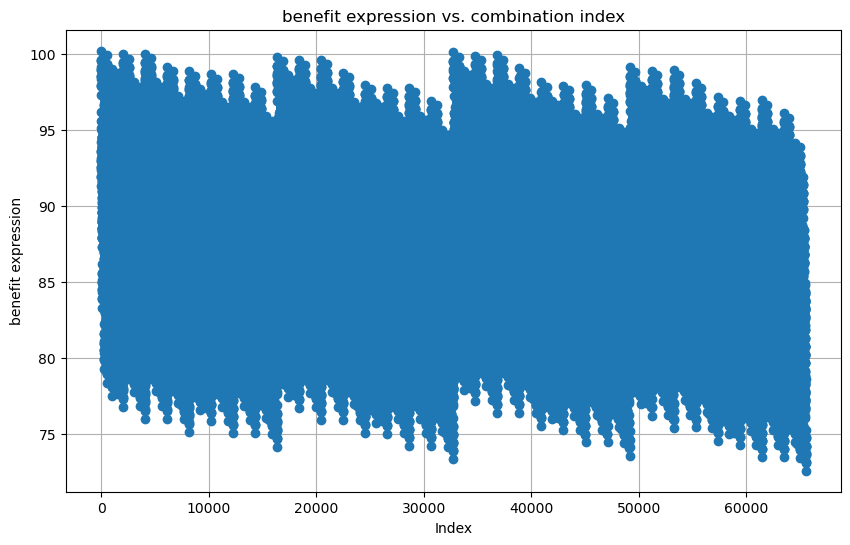

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 Excel 文件
file_path = '4.xlsx'  # 将文件路径替换为实际文件路径
df = pd.read_excel(file_path)

# 获取第四列的数据，假设第四列是 index 3
fourth_column = df.iloc[:, 3]

# 绘制第四列随索引变化的关系
plt.figure(figsize=(10, 6))
plt.plot(fourth_column, marker='o', linestyle='-')
plt.title('benefit expression vs. combination index')
plt.xlabel('Index')
plt.ylabel('benefit expression')
plt.grid(True)
plt.show()


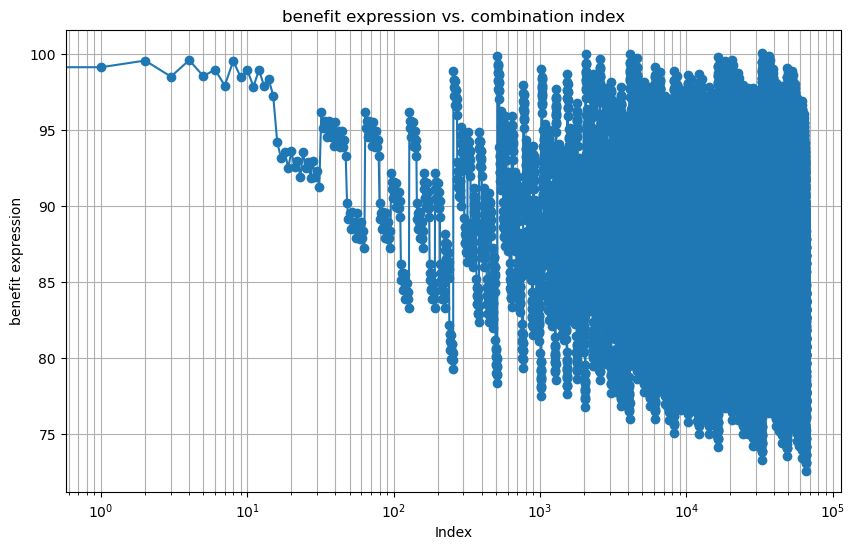

In [22]:
file_path = '4.xlsx'   
df = pd.read_excel(file_path)
 
fourth_column = df.iloc[:, 3] 
plt.figure(figsize=(10, 6))
plt.plot(fourth_column, marker='o', linestyle='-')
plt.xscale('log')  
plt.title('benefit expression vs. combination index')
plt.xlabel('Index')
plt.ylabel('benefit expression')
plt.grid(True, which="both")  # 显示网格线
plt.show()


In [ ]:
import pandas as pd  
import itertools  
import numpy as np  
from sympy import symbols, Min, simplify  

# 定义符号变量  
n0 = 1  # 将 n0 设置为 1  
alpha1, alpha2, alpha3, alpha4, alpha5, alpha6, alpha7, alpha8 = symbols(  
    'alpha1 alpha2 alpha3 alpha4 alpha5 alpha6 alpha7 alpha8')  
beta1, beta2, beta3, beta4 = symbols('beta1 beta2 beta3 beta4')  
c1, c2, c3, c4 = symbols('c1 c2 c3 c4')  

# 定义参数均值和标准差  
mean_p = 0.1  
sigma = 0.025  
num_simulations = 1000  # 设置模拟次数  

# 初始化数据存储列表  
results = []  

# 所有可能的组合  
alpha_combinations = list(itertools.product([0, 1], repeat=8))  
beta_combinations = list(itertools.product([0, 1], repeat=4))  
c_combinations = list(itertools.product([0, 1], repeat=4))  

# 多次模拟  
for _ in range(num_simulations):  
    # 从正态分布生成参数 p1 到 p13  
    p_values = np.random.normal(mean_p, sigma, 13).clip(0)  # 确保值非负  
    p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13 = p_values  

    # 计算每种组合的 benefit  
    for alpha in alpha_combinations:  
        for beta in beta_combinations:  
            for c in c_combinations:  
                alpha_vals = alpha  
                beta_vals = beta  
                c_vals = c  
                
                h1 = Min(n0, (1 - alpha_vals[0] * p1) * n0, (1 - alpha_vals[1] * p2) * n0, (1 - alpha_vals[2] * p3) * n0)  
                h2 = Min(n0, (1 - alpha_vals[3] * p4) * n0, (1 - alpha_vals[4] * p5) * n0, (1 - alpha_vals[5] * p6) * n0)  
                h3 = Min(n0, (1 - alpha_vals[6] * p7) * n0, (1 - alpha_vals[7] * p8) * n0)  
                h4 = n0  # h4 直接为 n0  

                # 计算 u_1, u_2, u_3, u_4  
                u1 = p9 * h1  
                u2 = p10 * h2  
                u3 = p11 * h3  
                u4 = p12 * h4  

                # 计算 z  
                z = (64 * n0 +  
                     8 * (h1 + h2 + h3 + h4) +  
                     alpha_vals[0] * n0 + alpha_vals[1] * n0 +  
                     alpha_vals[2] * 2 * n0 + alpha_vals[3] * n0 +  
                     alpha_vals[4] * n0 + alpha_vals[5] * 2 * n0 +  


In [ ]:
import pandas as pd
import itertools
import numpy as np
from sympy import symbols, Min, simplify

# 定义符号变量 n0
n0 = symbols('n0')

# 定义参数
b1, b2, t1, t2, t3, s0, d0, l0, p1_mean, p2_mean, p3_mean, c0 = 4, 18, 2, 3, 3, 56, 5, 6, 0.1, 0.1, 0.1, 6
sigma = 0.025  # 正态分布的标准差

# 初始化数据存储列表
data = []

# 所有可能的 α 组合
alpha_combinations = list(itertools.product([0, 1], repeat=4))

# 进行多次模拟
num_simulations = 1000  # 模拟次数
for _ in range(num_simulations):
    # 从正态分布中生成 p1, p2, p3
    p1 = np.random.normal(p1_mean, sigma)
    p2 = np.random.normal(p2_mean, sigma)
    p3 = np.random.normal(p3_mean, sigma)

    # 计算每种组合的 benefit
    for alpha in alpha_combinations:
        alpha1, alpha2, alpha3, alpha4 = alpha
        n1, n2 = 1, 1  # 这里将 n0 设置为 1

        # 计算 n3 和 n4
        n3 = Min(n1, n2, (1 - alpha1 * p1) * n1, (1 - alpha2 * p2) * n2)
        n4 = p3 * n3

        # 计算 z
        z = (b1 * n1 + b2 * n2 +
             alpha1 * t1 * n1 + alpha2 * t2 * n2 +
             c0 * n3 + alpha3 * t3 * n3 +
             l0 * n4 + alpha4 * d0 * n4 -
             alpha3 * l0 * n4)

        # 计算 benefit
        benefit = s0 * n3 - z

        # 简化并存储结果
        benefit_expr = str(simplify(benefit))
        data.append((alpha, benefit_expr, float(benefit)))

# 创建 DataFrame
df = pd.DataFrame(data, columns=['Alpha Combination', 'Benefit Expression', 'Benefit Value'])

# 计算每种组合的均值和标准差
summary = df.groupby('Alpha Combination')['Benefit Value'].agg(['mean', 'std']).reset_index()

# 保存结果到 Excel 文件
excel_filename = 'benefit_results_with_n0_1_simulation.xlsx'
df.to_excel(excel_filename, index=False)

summary_filename = 'benefit_summary_statistics.xlsx'
summary.to_excel(summary_filename, index=False)

print(f"Results have been saved to {excel_filename}")
print(f"Summary statistics have been saved to {summary_filename}")

In [ ]:
import pandas as pd
import itertools
from sympy import symbols, Min, simplify

# 定义符号变量
n0 = 1  # 将 n0 设置为 1
alpha1, alpha2, alpha3, alpha4, alpha5, alpha6, alpha7, alpha8 = symbols(
    'alpha1 alpha2 alpha3 alpha4 alpha5 alpha6 alpha7 alpha8')
beta1, beta2, beta3, beta4 = symbols('beta1 beta2 beta3 beta4')
c1, c2, c3, c4 = symbols('c1 c2 c3 c4')
p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13 = [0.1] * 13

# 定义决策变量组合
alpha_combinations = list(itertools.product([0, 1], repeat=8))
beta_combinations = list(itertools.product([0, 1], repeat=4))
c_combinations = list(itertools.product([0, 1], repeat=4))

# 初始化数据存储列表
data = []

# 计算每种组合的 benefit
for alpha in alpha_combinations:
    for beta in beta_combinations:
        for c in c_combinations:
            alpha_vals = alpha
            beta_vals = beta
            c_vals = c

            # 计算 h_1, h_2, h_3, h_4
            h1 = Min(n0, (1 - alpha_vals[0] * p1) * n0, (1 - alpha_vals[1] * p2) * n0, (1 - alpha_vals[2] * p3) * n0)
            h2 = Min(n0, (1 - alpha_vals[3] * p4) * n0, (1 - alpha_vals[4] * p5) * n0, (1 - alpha_vals[5] * p6) * n0)
            h3 = Min(n0, (1 - alpha_vals[6] * p7) * n0, (1 - alpha_vals[7] * p8) * n0)
            h4 = n0  # h4 直接为 n0

            # 计算 u_1, u_2, u_3, u_4
            u1 = p9 * h1
            u2 = p10 * h2
            u3 = p11 * h3
            u4 = p12 * h4

            # 计算 z
            z = (64 * n0 + 8 * (h1 + h2 + h3 + h4) +
                 alpha_vals[0] * n0 + alpha_vals[1] * n0 +
                 alpha_vals[2] * 2 * n0 + alpha_vals[3] * n0 +
                 alpha_vals[4] * n0 + alpha_vals[5] * 2 * n0 +
                 alpha_vals[6] * n0 + alpha_vals[7] * 2 * n0 +
                 beta_vals[0] * 4 * h1 + beta_vals[1] * 4 * h2 +
                 beta_vals[2] * 4 * h3 + beta_vals[3] * 6 * h4 +
                 c_vals[0] * 6 * u1 + c_vals[1] * 6 * u2 +
                 c_vals[2] * 6 * u3 + c_vals[3] * 10 * u4 +
                 40 * u4 - p4 * 40 * u4)

            # 计算 benefit
            benefit = 200 * h4 - z



In [ ]:
import pandas as pd
import itertools
from sympy import symbols, Piecewise

# 定义符号变量 n0
n0 = symbols('n0')

# 定义参数
b1, b2, t1, t2, t3, s0, d0, l0, p1, p2, p3, c0 = 4, 18, 2, 3, 3, 56, 40, 10, 0.05, 0.05, 0.05, 6

# 初始化数据存储列表
data = []

# 所有可能的α组合
alpha_combinations = list(itertools.product([0, 1], repeat=4))

# 计算每种组合的 benefit
for alpha in alpha_combinations:
    alpha1, alpha2, alpha3, alpha4 = alpha
    n1, n2 = n0, n0  # n1 = n2 = n0

    # 计算 n3 和 n4
    n3 = Piecewise((n0, (1-alpha1)*(1-alpha2)), (alpha1*0.9*n0, alpha1), (alpha2*0.9*n0, alpha2), (0.9*n0, True))
    n4 = p3 * n3

    # 计算 z
    z = b1*n1 + b2*n2 + alpha1*t1*n1 + alpha2*t2*n2 + c0*n3 + alpha3*t3*n3 + alpha4*d0*n4 - alpha3*l0*n4

    # 计算 benefit
    benefit = s0*n3 - z

    # 简化并存储结果
    benefit_expr = str(benefit.simplify())
    data.append((alpha, benefit_expr))

# 创建DataFrame
df = pd.DataFrame(data, columns=['Alpha Combination', 'Benefit Expression'])

# 将DataFrame写入Excel文件
excel_filename = 'benefit_results.xlsx'
df.to_excel(excel_filename, index=False)

print(f"Results have been saved to {excel_filename}")